In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
from scipy import stats

/Users/ruhe/Desktop/ga2o3/FP/tabGap/Ga/gardf/FP.100
/Users/ruhe/Desktop/ga2o3/FP/tabGap/Ga/gardf/FP.500
/Users/ruhe/Desktop/ga2o3/FP/tabGap/Ga/gardf/FP.1200
Ga [0.86599738 0.53788183 0.52794753]
Ga [0.54998319 0.88050998 0.87282239]
O [0.99101037 0.9768559  0.98698089]
O [0.11359239 0.16090264 0.14067069]
MIX [0.92406174 0.82136119 0.61521282]
MIX [0.4175557  0.62068134 0.791094  ]


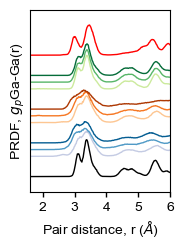

In [34]:
path='/Users/ruhe/Desktop/ga2o3/FP/tabGap'
os.chdir(path)
f3='beta_ga_rdf'
Gardf_beta=pd.read_csv(f3, sep=' ',skiprows=1) 
f4='gamma_ga_rdf'
Gardf_gamma=pd.read_csv(f4, sep=' ',skiprows=1)  
f5='beta_o_rdf'
Ordf_beta=pd.read_csv(f5, sep=' ',skiprows=1) 
f6='gamma_o_rdf'
Ordf_gamma=pd.read_csv(f6, sep=' ',skiprows=1) 
l=[100,500,1200] 
fptype=['Ga','mix','O'] 
Pr_O_beta=np.zeros(3) 
Pr_O_gamma=np.zeros(3) 
Pr_Ga_beta=np.zeros(3) 
Pr_Ga_gamma=np.zeros(3) 
Pr_mix_beta=np.zeros(3) 
Pr_mix_gamma=np.zeros(3) 
cmp1=plt.get_cmap('PuBu')
cmp2=plt.get_cmap('Oranges')
cmp3=plt.get_cmap('YlGn')
for j in range(3):
    c1= cmp1((j+1)/3.5)
    c2= cmp2((j+1)/3.5)
    c3= cmp3((j+1)/3.5)
    i=l[j] 
    f=path+'/'+fptype[0]+'/gardf/'+'FP.'+str(i) 
    print(f)
    rdf=pd.read_csv(f, sep=' ',skiprows=1) 
    f1=path+'/'+fptype[1]+'/gardf/'+'FP.'+str(i)  
    rdf2=pd.read_csv(f1, sep=' ',skiprows=1) 
    f2=path+'/'+fptype[2]+'/gardf/'+'FP.'+str(i) 
    rdf3=pd.read_csv(f2, sep=' ',skiprows=1) 

    plt.plot(rdf.iloc[80:,0],rdf.iloc[80:,1]+j*1,label=f,linewidth=1,color=c1)
    plt.plot(rdf2.iloc[80:,0],rdf2.iloc[80:,1]+j*1+5,label=f1,linewidth=1,color=c2)
    plt.plot(rdf3.iloc[80:,0],rdf3.iloc[80:,1]+j*1+10,label=f2,linewidth=1,color=c3)
#plt.plot(rdfanneal.iloc[40:,0],rdfanneal.iloc[40:,1]+j*3,'-+',label=annealf)
    Pr_Ga_beta[j]=stats.pearsonr(rdf.iloc[200:260,1], Gardf_beta.iloc[200:260,1])[0]
    Pr_Ga_gamma[j]=stats.pearsonr(rdf.iloc[200:260,1], Gardf_gamma.iloc[200:260,1])[0]
    Pr_mix_beta[j]=stats.pearsonr(rdf2.iloc[200:260,1], Gardf_beta.iloc[200:260,1])[0]
    Pr_mix_gamma[j]=stats.pearsonr(rdf2.iloc[200:260,1], Gardf_gamma.iloc[200:260,1])[0]
    Pr_O_beta[j]=stats.pearsonr(rdf3.iloc[200:260,1], Gardf_beta.iloc[200:260,1])[0]
    Pr_O_gamma[j]=stats.pearsonr(rdf3.iloc[200:260,1], Gardf_gamma.iloc[200:260,1])[0]
print('Ga',Pr_Ga_beta) 
print('Ga',Pr_Ga_gamma) 
print('O',Pr_O_beta) 
print('O',Pr_O_gamma) 
print('MIX',Pr_mix_beta) 
print('MIX',Pr_mix_gamma) 
plt.plot(Gardf_beta.iloc[80:,0],Gardf_beta.iloc[80:,1]-3,label=f3,linewidth=1,color='black') 
plt.plot(Gardf_gamma.iloc[80:,0],Gardf_gamma.iloc[80:,1]+j*7+1,label=f4,linewidth=1,color='red')



plt.xlabel('Pair distance, r ($\AA$)',fontsize=10)
#plt.rcParams["axes.linewidth"] = 1 
plt.rcParams["figure.figsize"] = (4.6/2.54,6/2.54) 
plt.xticks(fontsize=10) 
plt.tick_params(width=1)
plt.yticks(fontsize=10) #plt.legend(fontsize=10) 
plt.yticks([]) 
plt.margins(x=0) 
plt.margins(y=0.1) 
plt.xticks([2,3,4,5,6])
plt.ylabel('PRDF, $g_{p}$Ga-Ga(r)', labelpad=2, fontsize=10)
plt.rcParams["font.family"] = "arial"
plt.savefig('/Users/ruhe/Desktop/ga2o3/FP/figure/gaRDF', format='svg')

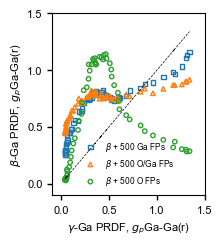

In [42]:
plt.plot(Gardf_gamma.iloc[200:260,1],Gardf_gamma.iloc[200:260,1],'--',color='black',linewidth=0.5)
plt.scatter(Gardf_gamma.iloc[200:260,1],rdf.iloc[200:260,1],marker = 's',facecolors='none',edgecolors='C0',s=10,label=r'$\beta$ + 500 Ga FPs')
plt.scatter(Gardf_gamma.iloc[200:260,1],rdf2.iloc[200:260,1],marker = "^",facecolors='none',edgecolors='C1',s=10,label=r'$\beta$ + 500 O/Ga FPs')
plt.scatter(Gardf_gamma.iloc[200:260,1],rdf3.iloc[200:260,1],marker = "o",facecolors='none',edgecolors='C2',s=10,label=r'$\beta$ + 500 O FPs')
plt.xlabel(r'$\gamma$-Ga PRDF, $g_{p}$Ga-Ga(r)',fontsize=8) 
#plt.rcParams["axes.linewidth"] = 1 
plt.rcParams["figure.figsize"] = (5/2.54,6/2.54) 
plt.xticks(fontsize=8) 
plt.tick_params(width=1)
plt.yticks(fontsize=8) #plt.legend(fontsize=8) 
plt.margins(x=0.1) 
plt.margins(y=0.1) 
plt.xticks([0,0.5,1.0,1.5])
plt.yticks([0,0.5,1.0,1.5])
plt.ylabel(r'$\beta$-Ga PRDF, $g_{p}$Ga-Ga(r)', labelpad=2, fontsize=8)
plt.rcParams["font.family"] = "arial"
plt.legend(fontsize=6,loc='lower center', frameon=False)
plt.savefig('/Users/ruhe/Desktop/ga2o3/FP/figure/gardf_2shell', format='svg')

[0.99696549 0.86599738 0.79726201 0.63189134 0.61278508 0.53788183
 0.45270443 0.37225644 0.33877804 0.4289528  0.36258905]
[0.09582539 0.54998319 0.66026576 0.81022737 0.81989964 0.88050998
 0.86884251 0.89852576 0.92630785 0.88097246 0.93522565]


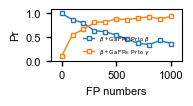

In [10]:
l=np.array([i for i in range(0,1100,100) ])
gal=l/512
n=len(l)
Pr_Ga_beta=np.zeros(n) 
Pr_Ga_gamma=np.zeros(n) 
#Gardf_beta=pd.read_csv('/Users/ruhe/Desktop/ga2o3/FP/Ga/gardf/FPs.0', sep=' ',skiprows=1) 
for j in range(n): 
    i=l[j] 
    f='/Users/ruhe/Desktop/ga2o3/FP/Ga/gardf/'+'FP.'+str(i) 
    rdf=pd.read_csv(f, sep=' ',skiprows=1) 

    Pr_Ga_beta[j]=stats.pearsonr(rdf.iloc[200:260,1], Gardf_beta.iloc[200:260,1])[0]
    Pr_Ga_gamma[j]=stats.pearsonr(rdf.iloc[200:260,1], Gardf_gamma.iloc[200:260,1])[0]


plt.plot(l,Pr_Ga_beta,label=r'$\beta$ + Ga FPs: Pr to $\beta$',marker="s",markerfacecolor='white',linewidth=1, markersize=3)
plt.plot(l,Pr_Ga_gamma,linewidth=1,label=r'$\beta$ + Ga FPs: Pr to $\gamma$',marker="s", markerfacecolor='white',markersize=3)
plt.xlabel('FP numbers',fontsize=8) 
plt.ylabel('Pr',fontsize=8)
#plt.rcParams["axes.linewidth"] = 1 
plt.rcParams["figure.figsize"] = (4.3/2.54,1.7/2.54) 
plt.xticks(fontsize=8) 
plt.tick_params(width=1)
plt.yticks(fontsize=8) #plt.legend(fontsize=8) 
plt.margins(x=0.1) 
plt.margins(y=0.1) 
plt.yticks([0,0.5,1.0])
plt.rcParams["font.family"] = "arial"
plt.legend(fontsize=4,loc='lower center', frameon=False)
plt.savefig('figure/2PRDF', format='svg')
print(Pr_Ga_beta)
print(Pr_Ga_gamma)

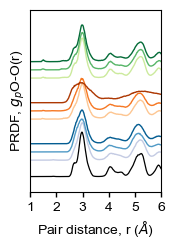

In [32]:
fptype=['Ga','mix','O'] 
l=[100,500,1200] 
cmp1=plt.get_cmap('PuBu')
cmp2=plt.get_cmap('Oranges')
cmp3=plt.get_cmap('YlGn')
for j in range(3):
    c1= cmp1((j+1)/3.5)
    c2= cmp2((j+1)/3.5)
    c3= cmp3((j+1)/3.5)
    i=l[j]
    f=path+'/'+fptype[0]+'/ordf/'+'FP.'+str(i)
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    f1=path+'/'+fptype[1]+'/ordf/'+'FP.'+str(i)
    rdf2=pd.read_csv(f1, sep=' ',skiprows=1) 
    f2=path+'/'+fptype[2]+'/ordf/'+'FP.'+str(i)
    rdf1=pd.read_csv(f2, sep=' ',skiprows=1) 
  

    plt.plot(rdf.iloc[50:,0],rdf.iloc[50:,1]+j*1,label=f,linewidth=1,color=c1)
    plt.plot(rdf2.iloc[50:,0],rdf2.iloc[50:,1]+j*1+5,label=f1,linewidth=1,color=c2)
    plt.plot(rdf1.iloc[50:,0],rdf1.iloc[50:,1]+j*1+10,label=f2,linewidth=1,color=c3)
    #plt.plot(rdfanneal.iloc[50:,0],rdfanneal.iloc[50:,1]+j*1,'-+',label=annealf)

    
plt.plot(Ordf_beta.iloc[50:,0],Ordf_beta.iloc[50:,1]-2,label=f5,linewidth=0.9,linestyle='-',color='black')
#plt.plot(Ordf_gamma.iloc[50:,0],Ordf_gamma.iloc[50:,1]-3,label=f6,linewidth=1)
   
plt.xlabel('Pair distance, r ($\AA$)',fontsize=10)
#plt.rcParams["axes.linewidth"] = 1 
plt.rcParams["figure.figsize"] = (4.3/2.54,6/2.54) 
plt.xticks(fontsize=10) 
plt.tick_params(width=1)
plt.yticks(fontsize=10) #plt.legend(fontsize=10) 
plt.yticks([]) 
plt.margins(x=0) 
plt.margins(y=0.1) 
plt.xticks([1,2,3,4,5,6])
plt.ylabel('PRDF, $g_{p}$O-O(r)', labelpad=2, fontsize=10)
plt.rcParams["font.family"] = "arial"
plt.savefig('/Users/ruhe/Desktop/ga2o3/FP/figure/ORDF', format='svg')

In [12]:
l=[i for i in range(0,1200,100) ]
n=len(l)
Pr_O_beta=np.zeros(n) 
 
Pr_Ga_beta=np.zeros(n) 

Pr_mix_beta=np.zeros(n) 
Ordf_beta=pd.read_csv('/Users/ruhe/Desktop/ga2o3/FP/tabGap/Ga/ordf/FPs.0', sep=' ',skiprows=1)
for j in range(n): 
    i=l[j] 
    f='/Users/ruhe/Desktop/ga2o3/FP/tabGap/Ga/Ordf/'+'FPs.'+str(i) 
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    f1='/Users/ruhe/Desktop/ga2o3/FP/tabGap/O/Ordf/'+'FPs.'+str(i) 
    rdf2=pd.read_csv(f1, sep=' ',skiprows=1) 
    f2='/Users/ruhe/Desktop/ga2o3/FP/tabGap/mix/Ordf/'+'FPs.'+str(i) 
    rdf3=pd.read_csv(f2, sep=' ',skiprows=1)

    Pr_Ga_beta[j]=stats.pearsonr(rdf.iloc[180:230,1], Ordf_beta.iloc[180:230,1])[0]

    Pr_O_beta[j]=stats.pearsonr(rdf2.iloc[180:230,1], Ordf_beta.iloc[180:230,1])[0]

    Pr_mix_beta[j]=stats.pearsonr(rdf3.iloc[180:230,1], Ordf_beta.iloc[180:230,1])[0]



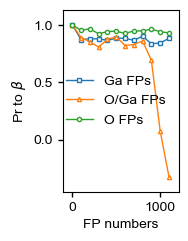

In [21]:

plt.plot(l,Pr_Ga_beta,marker="s",markersize=3,markerfacecolor='white',linewidth=1,label=r'Ga FPs')
plt.plot(l,Pr_mix_beta,marker='^', markersize=3,markerfacecolor='white',linewidth=1,label=r'O/Ga FPs')
plt.plot(l,Pr_O_beta,marker="o", markersize=3,markerfacecolor='white',linewidth=1,label=r'O FPs')
plt.xlabel('FP numbers',fontsize=10) 
plt.ylabel(r'Pr to $\beta$',fontsize=10)
plt.rcParams["figure.figsize"] = (3.8/2.54,6/2.54) 
plt.xticks(fontsize=10) 
plt.tick_params(width=1)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, frameon=False) 
plt.margins(x=0.1) 
plt.margins(y=0.1) 
plt.rcParams["font.family"] = "arial"
plt.savefig('/Users/ruhe/Desktop/ga2o3/FP/figure/1ORDF', format='svg')

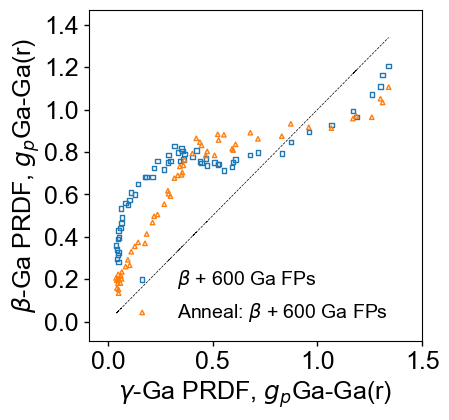

In [12]:

f=path+'/'+fptype[0]+'/gardf/'+'FP.600'
rdf=pd.read_csv(f, sep=' ',skiprows=1) 
f1=path+'/'+fptype[0]+'/gardf/'+'annealss.600'  
rdf2=pd.read_csv(f1, sep=' ',skiprows=1)
plt.plot(Gardf_gamma.iloc[200:260,1],Gardf_gamma.iloc[200:260,1],'--',color='black',linewidth=0.5)
plt.scatter(Gardf_gamma.iloc[200:260,1],rdf.iloc[200:260,1],marker = 's',facecolors='none',edgecolors='C0',s=10,label=r'$\beta$ + 600 Ga FPs')
plt.scatter(Gardf_gamma.iloc[200:260,1],rdf2.iloc[200:260,1],marker = "^",facecolors='none',edgecolors='C1',s=10,label=r'Anneal: $\beta$ + 600 Ga FPs')

plt.xlabel(r'$\gamma$-Ga PRDF, $g_{p}$Ga-Ga(r)',fontsize=18) 
#plt.rcParams["axes.linewidth"] = 1 
plt.rcParams["figure.figsize"] = (4.3,4.3) 
plt.xticks(fontsize=18) 
plt.tick_params(width=1)
plt.yticks(fontsize=18) #plt.legend(fontsize=8) 
plt.margins(x=0.1) 
plt.margins(y=0.1) 
plt.xticks([0,0.5,1.0,1.5])
plt.ylabel(r'$\beta$-Ga PRDF, $g_{p}$Ga-Ga(r)', labelpad=2, fontsize=18)
plt.rcParams["font.family"] = "arial"
plt.legend(fontsize=14,loc='lower center', frameon=False)
#plt.savefig('figure/1PRDF', format='svg')

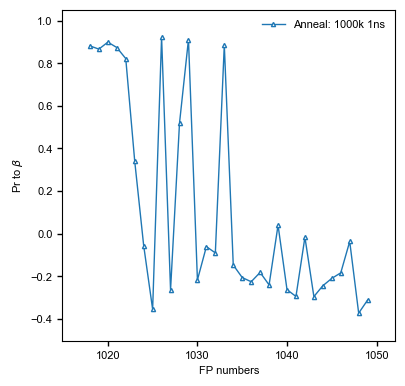

In [13]:
path='/Users/ruhe/Desktop/ga2o3/FP/mix/anneal_1000K_1ns/Ordf'
os.chdir(path)
l=[i for i in range(0,32) ]
pka=[i for i in range(1018,1050) ]
n=len(l)
Pr_mix_beta=np.zeros(n) 
Ordf_beta=pd.read_csv('/Users/ruhe/Desktop/ga2o3/FP/Ga/ordf/FPs.0', sep=' ',skiprows=1)
for j in range(n): 
    i=l[j] 
    f='pka.'+str(i) 
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
   
    Pr_mix_beta[j]=stats.pearsonr(rdf.iloc[180:230,1], Ordf_beta.iloc[180:230,1])[0]
plt.plot(pka,Pr_mix_beta,marker='^', markersize=3,markerfacecolor='white',linewidth=1,label=r'Anneal: 1000k 1ns')
path='/Users/ruhe/Desktop/ga2o3/FP/mix/anneal_1100K_1ns/Ordf'
os.chdir(path)
l=[i for i in range(0,32) ]
pka=[i for i in range(1018,1050) ]
n=len(l)
Pr_mix_beta=np.zeros(n) 
Ordf_beta=pd.read_csv('/Users/ruhe/Desktop/ga2o3/FP/Ga/ordf/FPs.0', sep=' ',skiprows=1)
for j in range(n): 
    i=l[j] 
    f='pka.'+str(i) 
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
   
    Pr_mix_beta[j]=stats.pearsonr(rdf.iloc[180:230,1], Ordf_beta.iloc[180:230,1])[0]
#plt.plot(pka,Pr_mix_beta,marker='^', markersize=3,markerfacecolor='white',linewidth=1,label=r'Anneal: 1100k 1ns')

plt.xlabel('FP numbers',fontsize=8) 
plt.ylabel(r'Pr to $\beta$',fontsize=8)
plt.rcParams["figure.figsize"] = (4.3,6) 
plt.xticks(fontsize=8) 
plt.tick_params(width=1)
plt.yticks(fontsize=8)
plt.legend(fontsize=8, frameon=False) 
plt.margins(x=0.1) 
plt.margins(y=0.1) 
plt.rcParams["font.family"] = "arial"


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]


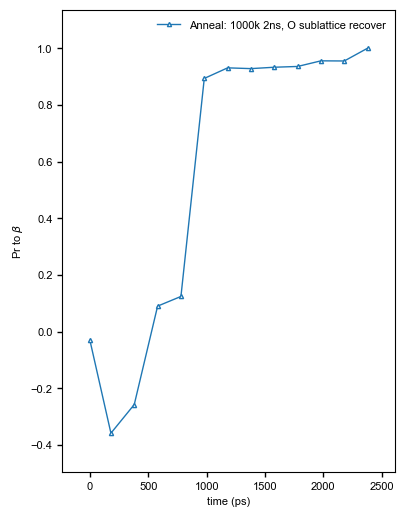

In [60]:
path='/Users/ruhe/Desktop/ga2o3/FP/mix/anneal_1000K_2ns/ordf'
os.chdir(path)
l=[i for i in range(0,121,10) ]
print(l)
time=np.zeros(len(l))
n=len(l)
Pr_mix_beta=np.zeros(n) 
Ordf_beta=pd.read_csv('frame.120', sep=' ',skiprows=1)
for j in range(n): 
    i=l[j] 
    f='frame.'+str(i) 
    rdf=pd.read_csv(f, sep=' ',skiprows=1)   
    Pr_mix_beta[j]=stats.pearsonr(rdf.iloc[180:230,1], Ordf_beta.iloc[180:230,1])[0]
    time[j]=(i*10000-10000)*0.002
time[0]=0
plt.plot(time,Pr_mix_beta,marker='^', markersize=3,markerfacecolor='white',linewidth=1,label=r'Anneal: 1000k 2ns, O sublattice recover')

plt.xlabel('time (ps)',fontsize=8) 
plt.ylabel(r'Pr to $\beta$',fontsize=8)
plt.rcParams["figure.figsize"] = (4.3,6) 
plt.xticks(fontsize=8) 
plt.tick_params(width=1)
plt.yticks(fontsize=8)
plt.legend(fontsize=8, frameon=False) 
plt.margins(x=0.1) 
plt.margins(y=0.1) 
plt.rcParams["font.family"] = "arial"

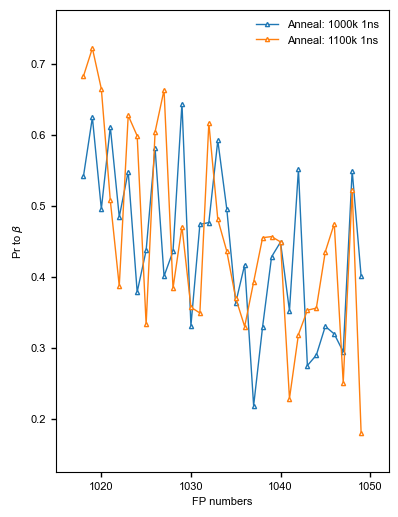

In [15]:
path='/Users/ruhe/Desktop/ga2o3/FP/mix/anneal_1000K_1ns/Gardf'
os.chdir(path)
l=[i for i in range(0,32) ]
pka=[i for i in range(1018,1050) ]
n=len(l)
Pr_mix_beta=np.zeros(n) 
f3='/Users/ruhe/Desktop/ga2o3/FP/'+'beta_ga_rdf'
Gardf_beta=pd.read_csv(f3, sep=' ',skiprows=1) 
for j in range(n): 
    i=l[j] 
    f='pka.'+str(i) 
    rdf=pd.read_csv(f, sep=' ',skiprows=1)
    Pr_mix_beta[j]=stats.pearsonr(rdf.iloc[200:260,1], Gardf_beta.iloc[200:260,1])[0]
plt.plot(pka,Pr_mix_beta,marker='^', markersize=3,markerfacecolor='white',linewidth=1,label=r'Anneal: 1000k 1ns')
path='/Users/ruhe/Desktop/ga2o3/FP/mix/anneal_1100K_1ns/Gardf'
os.chdir(path)
l=[i for i in range(0,32) ]
pka=[i for i in range(1018,1050) ]
n=len(l)
Pr_mix_beta=np.zeros(n) 
for j in range(n): 
    i=l[j] 
    f='pka.'+str(i) 
    rdf=pd.read_csv(f, sep=' ',skiprows=1)   
    Pr_mix_beta[j]=stats.pearsonr(rdf.iloc[200:260,1], Gardf_beta.iloc[200:260,1])[0]
plt.plot(pka,Pr_mix_beta,marker='^', markersize=3,markerfacecolor='white',linewidth=1,label=r'Anneal: 1100k 1ns')

plt.xlabel('FP numbers',fontsize=8) 
plt.ylabel(r'Pr to $\beta$',fontsize=8)
plt.rcParams["figure.figsize"] = (4.3,6) 
plt.xticks(fontsize=8) 
plt.tick_params(width=1)
plt.yticks(fontsize=8)
plt.legend(fontsize=8, frameon=False) 
plt.margins(x=0.1) 
plt.margins(y=0.1) 
plt.rcParams["font.family"] = "arial"


In [78]:
path='/Users/ruhe/Desktop/ga2o3/FP/mix/anneal_1000K_1ns/Ordf'
os.chdir(path)


4.2222928046520805